# Kaggle House Price Prediction

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"C:\Users\DELL\Desktop\train.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)
df = df.drop("Id", axis=1)

In [2]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 80)

In [4]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


# define categorical columns and numerical columns

In [5]:
cat_cols = ["MSSubClass", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "GarageYrBlt"
           , "BsmtFullBath", "BsmtHalfBath", "HalfBath", "YrSold"]
num_cols = []

for column in cat_cols:
    df[column] = df[column].astype(str)

        
for column in df.columns:
    if df[column].dtypes == object:
        if column in cat_cols:
            pass
        else:
            cat_cols.append(column)
    else:
        num_cols.append(column)

In [6]:
len(cat_cols), len(num_cols), len(cat_cols) + len(num_cols)

(53, 27, 80)

In [7]:
df.dtypes

MSSubClass        object
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual       object
OverallCond       object
YearBuilt         object
YearRemodAdd      object
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


# Now check the categorical columns for Data Preprocessing

In [8]:
df_cat = df[cat_cols]
df_cat.head(15)

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,7,5,2003,2003,2003.0,1,0,1,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,6,8,1976,1976,1976.0,0,1,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,7,5,2001,2002,2001.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,7,5,1915,1970,1998.0,1,0,0,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,8,5,2000,2000,2000.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
5,50,5,5,1993,1995,1993.0,1,0,1,2009,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Wood,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,MnPrv,Shed,WD,Normal
6,20,8,5,2004,2005,2004.0,1,0,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
7,60,7,6,1973,1973,1973.0,1,0,1,2009,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,Gable,CompShg,HdBoard,HdBoard,Stone,TA,TA,CBlock,Gd,TA,Mn,ALQ,BLQ,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,Shed,WD,Normal
8,50,7,5,1931,1950,1931.0,0,0,0,2008,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,Gable,CompShg,BrkFace,Wd Shng,None,TA,TA,BrkTil,TA,TA,No,Unf,Unf,GasA,Gd,Y,FuseF,TA,Min1,TA,Detchd,Unf,Fa,TA,Y,NaN,NaN,NaN,WD,Abnorml
9,190,5,6,1939,1950,1939.0,1,0,0,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,BrkTil,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,Gd,TA,Y,NaN,NaN,NaN,WD,Normal


In [9]:
df_cat.dtypes

MSSubClass       object
OverallQual      object
OverallCond      object
YearBuilt        object
YearRemodAdd     object
GarageYrBlt      object
BsmtFullBath     object
BsmtHalfBath     object
HalfBath         object
YrSold           object
MSZoning         object
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Heating          object
HeatingQC        object
CentralAir       object
Electrical       object
KitchenQual      object
Functional      

# Print all the unique values in each of the categorical columns

In [10]:
for column in df_cat.columns:
    unq_val = df_cat[column].value_counts()
    print(f"Column Name= {column}\n", unq_val)

Column Name= MSSubClass
 20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Column Name= OverallQual
 5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64
Column Name= OverallCond
 5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64
Column Name= YearBuilt
 2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1998    25
1999    25
1965    24
2000    24
1970    24
1954    24
1958    24
2008    23
2002    23
1972    23
1971    22
1968    22
1950    20
1957    20
2001    20
1994    19
1962    19
1940    18
1966    18
2009    18
1995    18
1910    17
1993    17
1960    17
1963    16
1978    16
1925    16
1955    16
1967    16
1996    15
1941    15
1964    15
1961   

# Changing the MSSubClass

In [11]:
import warnings
warnings.filterwarnings("ignore")

category_mapping = {
    '20': 'Single-Story',
    '30': 'Single-Story',
    '40': 'Single-Story',
    '45': 'Single-Story',
    '50': 'Single-Story',
    '60': 'Two-Story',
    '70': 'Two-Story',
    '75': 'Two-Story',
    '80': 'Other',
    '85': 'Other',
    '90': 'Other',
    '120': 'Single-Story',
    '150': 'Single-Story',
    '160': 'Two-Story',
    '180': 'Other',
    '190': 'Other'
}

# Apply the mapping to your dataset's column using .replace()
df_cat['MSSubClass'] = df_cat['MSSubClass'].replace(category_mapping)


In [12]:
df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,7,5,2003,2003,2003.0,1,0,1,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,6,8,1976,1976,1976.0,0,1,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,7,5,2001,2002,2001.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,7,5,1915,1970,1998.0,1,0,0,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,8,5,2000,2000,2000.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Changing the OvelallQual and OverallCond

In [13]:
category_mapping={
    "10": "Excellent",
    "9" : "Excellent",
    "8" : "Excellent",
    "7" : "Excellent",
    "6" : "Good",
    "5" : "Good",
    "4" : "Good",
    "3" : "Poor",
    "2" : "Poor",
    "1" : "Poor"
}

df_cat["OverallQual"] = df_cat["OverallQual"].replace(category_mapping)
df_cat["OverallCond"] = df_cat["OverallCond"].replace(category_mapping)

df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,Excellent,Good,2003,2003,2003.0,1,0,1,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,Good,Excellent,1976,1976,1976.0,0,1,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,Excellent,Good,2001,2002,2001.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,Excellent,Good,1915,1970,1998.0,1,0,0,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,Excellent,Good,2000,2000,2000.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Changing the Built date and Remodelled Date

In [14]:
import numpy as np

df_cat['YearBuilt'] = pd.to_numeric(df_cat['YearBuilt'], errors='coerce') # This coerce value changes any non numeric values to Not a Number NaN values
df_cat['YearRemodAdd'] = pd.to_numeric(df_cat['YearRemodAdd'], errors='coerce')

df_cat["YearBuilt"] = np.where(df_cat["YearBuilt"] < 2000, "Built Before 2000", "Built After 2000")

df_cat["YearRemodAdd"] = np.where(df_cat["YearRemodAdd"] < 2000, "Remodelled Before 2000", "Remodelled After 2000")

df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,2003.0,1,0,1,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,1976.0,0,1,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,2001.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,1998.0,1,0,0,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,2000.0,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Changing Garage Year Built

In [15]:
df_cat["GarageYrBlt"] = pd.to_numeric(df_cat["GarageYrBlt"], errors="coerce")

df_cat["GarageYrBlt"] = np.where(df_cat["GarageYrBlt"] <2000, "Built Before 2000", "Built After 2000")

df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,1,0,1,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,0,1,0,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,1,0,0,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,1,0,1,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


# Changing BsmtFullBath	BsmtHalfBath	HalfBath

In [16]:
column = ["BsmtFullBath","BsmtHalfBath","HalfBath"]

for column in column:
    df_cat[column] = pd.to_numeric(df_cat[column], errors="coerce")
    df_cat[column] = np.where(df_cat[column] == 1, "Yes", "No")
    
df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,No,Yes,No,2007,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,Yes,No,No,2006,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [17]:
df_cat["YrSold"].value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

# Changing the YrSold

In [18]:
df_cat["YrSold"] = pd.to_numeric(df_cat["YrSold"], errors="coerce")
df_cat["YrSold"] = np.where(df_cat["YrSold"] < 2008, "Before 2008", "2008 or After")

df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [19]:
df_cat.isnull().sum()

MSSubClass          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
GarageYrBlt         0
BsmtFullBath        0
BsmtHalfBath        0
HalfBath            0
YrSold              0
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual

# We will remove all the columns having missing values more than 40%

In [20]:
missing_cols = []

for column in df_cat.columns:
    if df_cat[column].isnull().sum() >= 600:
        missing_cols.append(column)
    else:
        pass
    
missing_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [21]:
df_cat.shape

(1460, 53)

In [22]:
df_cat = df_cat.drop(missing_cols, axis=1)
df_cat.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [23]:
df_cat.shape

(1460, 48)

In [24]:
df_cat.isnull().sum()

MSSubClass        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt       0
BsmtFullBath      0
BsmtHalfBath      0
HalfBath          0
YrSold            0
MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

## we will fill those missing values with their respective mode in that column

In [25]:
for column in df_cat.columns:
    mode_value = df_cat[column].mode()[0]
    df_cat[column].fillna(mode_value, inplace=True)
    
df_cat.isnull().sum()

MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
GarageYrBlt      0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
YrSold           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

# Now we will use target encoding for these categorical data for feature selection and correleation analysis

### First let's understand the target encoding first

In [26]:
# practice

dummy = { "Category" : ["A", "B", "A", "A", "B", "C"],
        "Target" : [12, 11, 14, 25, 36, 12]}

df_dummy = pd.DataFrame(dummy)

df_dummy

,Category,Target
0,A,12
1,B,11
2,A,14
3,A,25
4,B,36
5,C,12


In [27]:

category_mean = df_dummy.groupby("Category")["Target"].mean()


In [28]:
category_mean

Category
A    17.0
B    23.5
C    12.0
Name: Target, dtype: float64

In [29]:
sorted_category = category_mean.sort_values(ascending=False).index

In [30]:
sorted_category

Index(['B', 'A', 'C'], dtype='object', name='Category')

In [31]:
encoded_values = {}

for index, category in enumerate(sorted_category, start=1):
    encoded_values[category] = index
    
encoded_values

{'B': 1, 'A': 2, 'C': 3}

In [32]:
df_dummy["Encoded_category"] = df_dummy["Category"].map(encoded_values)

In [33]:
df_dummy

,Category,Target,Encoded_category
0,A,12,2
1,B,11,1
2,A,14,2
3,A,25,2
4,B,36,1
5,C,12,3


# Original Cateogry Encoding

In [34]:
df_cat_new = pd.concat([df_cat, df["SalePrice"]], axis=1)

In [35]:
df_cat_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,208500
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,181500
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,223500
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,140000
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,250000


In [36]:
df_cat_new_en = pd.DataFrame()

for column in df_cat_new.columns:
    if column in df_cat.columns:
        category_mean = df_cat_new.groupby(column)["SalePrice"].mean()
        sorted_category = category_mean.sort_values(ascending=False).index
        encoded_values = {}
        for index, category in enumerate(sorted_category, start=1):
            encoded_values[category] = index
        df_cat_new_en[column+"_En"] = df_cat_new[column].map(encoded_values)


In [37]:
df_cat_new_en.head()

,MSSubClass_En,OverallQual_En,OverallCond_En,YearBuilt_En,YearRemodAdd_En,GarageYrBlt_En,BsmtFullBath_En,BsmtHalfBath_En,HalfBath_En,YrSold_En,MSZoning_En,Street_En,LotShape_En,LandContour_En,Utilities_En,LotConfig_En,LandSlope_En,Neighborhood_En,Condition1_En,Condition2_En,BldgType_En,HouseStyle_En,RoofStyle_En,RoofMatl_En,Exterior1st_En,Exterior2nd_En,MasVnrType_En,ExterQual_En,ExterCond_En,Foundation_En,BsmtQual_En,BsmtCond_En,BsmtExposure_En,BsmtFinType1_En,BsmtFinType2_En,Heating_En,HeatingQC_En,CentralAir_En,Electrical_En,KitchenQual_En,Functional_En,GarageType_En,GarageFinish_En,GarageQual_En,GarageCond_En,PavedDrive_En,SaleType_En,SaleCondition_En
0,1,1,1,1,1,1,1,1,1,2,2,1,4,3,1,5,3,9,5,4,1,2,5,6,4,4,2,2,2,1,2,2,4,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2
1,2,2,2,2,2,2,2,2,2,1,2,1,4,3,1,4,3,5,7,4,1,3,5,6,11,11,3,3,2,4,2,2,1,3,2,1,1,1,1,3,1,2,2,3,1,1,5,2
2,1,1,1,1,1,1,1,1,1,2,2,1,3,3,1,5,3,9,5,4,1,2,5,6,4,4,2,2,2,1,2,2,3,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2
3,1,1,1,2,2,2,1,1,2,1,2,1,3,3,1,3,3,8,5,4,1,2,5,6,10,8,3,3,2,5,3,1,4,3,2,1,2,1,1,2,1,5,3,3,1,1,5,5
4,1,1,1,1,1,1,1,1,1,2,2,1,3,3,1,4,3,1,5,4,1,2,5,6,4,4,2,2,2,1,2,2,2,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2


In [38]:
df_cat_new_en.dtypes

MSSubClass_En       int64
OverallQual_En      int64
OverallCond_En      int64
YearBuilt_En        int64
YearRemodAdd_En     int64
GarageYrBlt_En      int64
BsmtFullBath_En     int64
BsmtHalfBath_En     int64
HalfBath_En         int64
YrSold_En           int64
MSZoning_En         int64
Street_En           int64
LotShape_En         int64
LandContour_En      int64
Utilities_En        int64
LotConfig_En        int64
LandSlope_En        int64
Neighborhood_En     int64
Condition1_En       int64
Condition2_En       int64
BldgType_En         int64
HouseStyle_En       int64
RoofStyle_En        int64
RoofMatl_En         int64
Exterior1st_En      int64
Exterior2nd_En      int64
MasVnrType_En       int64
ExterQual_En        int64
ExterCond_En        int64
Foundation_En       int64
BsmtQual_En         int64
BsmtCond_En         int64
BsmtExposure_En     int64
BsmtFinType1_En     int64
BsmtFinType2_En     int64
Heating_En          int64
HeatingQC_En        int64
CentralAir_En       int64
Electrical_E

# Select the encoded category for Milticolinearity Reduction

In [39]:
df_cat_new_en["SalePrice"] = df_cat_new["SalePrice"]
df_cat_new_en.head()

,MSSubClass_En,OverallQual_En,OverallCond_En,YearBuilt_En,YearRemodAdd_En,GarageYrBlt_En,BsmtFullBath_En,BsmtHalfBath_En,HalfBath_En,YrSold_En,MSZoning_En,Street_En,LotShape_En,LandContour_En,Utilities_En,LotConfig_En,LandSlope_En,Neighborhood_En,Condition1_En,Condition2_En,BldgType_En,HouseStyle_En,RoofStyle_En,RoofMatl_En,Exterior1st_En,Exterior2nd_En,MasVnrType_En,ExterQual_En,ExterCond_En,Foundation_En,BsmtQual_En,BsmtCond_En,BsmtExposure_En,BsmtFinType1_En,BsmtFinType2_En,Heating_En,HeatingQC_En,CentralAir_En,Electrical_En,KitchenQual_En,Functional_En,GarageType_En,GarageFinish_En,GarageQual_En,GarageCond_En,PavedDrive_En,SaleType_En,SaleCondition_En,SalePrice
0,1,1,1,1,1,1,1,1,1,2,2,1,4,3,1,5,3,9,5,4,1,2,5,6,4,4,2,2,2,1,2,2,4,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2,208500
1,2,2,2,2,2,2,2,2,2,1,2,1,4,3,1,4,3,5,7,4,1,3,5,6,11,11,3,3,2,4,2,2,1,3,2,1,1,1,1,3,1,2,2,3,1,1,5,2,181500
2,1,1,1,1,1,1,1,1,1,2,2,1,3,3,1,5,3,9,5,4,1,2,5,6,4,4,2,2,2,1,2,2,3,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2,223500
3,1,1,1,2,2,2,1,1,2,1,2,1,3,3,1,3,3,8,5,4,1,2,5,6,10,8,3,3,2,5,3,1,4,3,2,1,2,1,1,2,1,5,3,3,1,1,5,5,140000
4,1,1,1,1,1,1,1,1,1,2,2,1,3,3,1,4,3,1,5,4,1,2,5,6,4,4,2,2,2,1,2,2,2,1,2,1,1,1,1,2,1,2,2,3,1,1,5,2,250000


<Axes: >

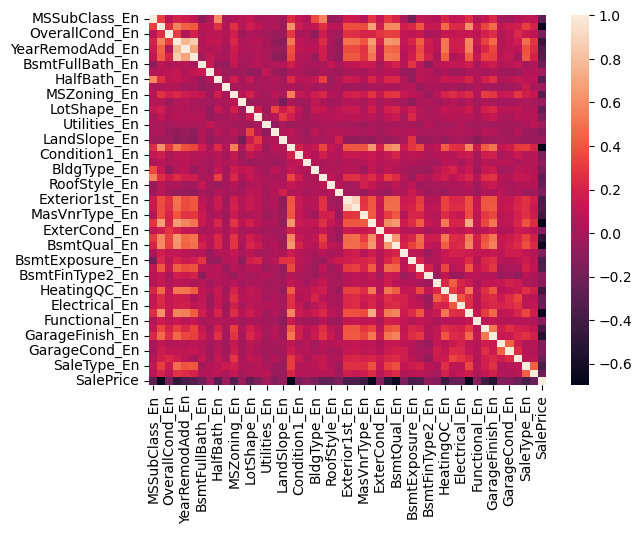

In [40]:
import seaborn as sns
encat_corr_matrix = df_cat_new_en.corr()
sns.heatmap(encat_corr_matrix)

In [41]:
def correletion(dframe, threshold):
    corr_cols = set()
    corr_matrix = dframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j])> threshold:
                col_name = corr_matrix.columns[i]
                corr_cols.add(col_name)
    return corr_cols

In [42]:
correletion(df_cat_new_en, 0.60)

{'BsmtQual_En',
 'ExterQual_En',
 'Exterior2nd_En',
 'Foundation_En',
 'GarageYrBlt_En',
 'KitchenQual_En',
 'Neighborhood_En',
 'SalePrice',
 'YearRemodAdd_En'}

In [43]:
cat_cols_remove = [
    'BsmtQual',
    'ExterQual',
    'Exterior2nd',
    'Foundation',
    'GarageYrBlt',
    'KitchenQual',
    'Neighborhood',
    'YearRemodAdd'
]

cat_sort_corr = encat_corr_matrix["SalePrice"].abs().sort_values(ascending=False)
selected_cat = encat_corr_matrix.head(25).index.to_list()

# Create an empty list to store modified selected categories
modified_selected_cat = []

for column in selected_cat:
    modified_column = column.replace("_En", "")  # Remove "_En" suffix
    if modified_column not in cat_cols_remove:
        modified_selected_cat.append(modified_column)

print(modified_selected_cat)


['MSSubClass', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFullBath', 'BsmtHalfBath', 'HalfBath', 'YrSold', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st']


In [44]:
df_num = df[num_cols]
for column in df_num.columns:
    mean_value = df_num[column].mean()
    df_num[column].fillna(mean_value, inplace=True)
df_num.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,2,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,2,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,2,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,2,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000


In [45]:
df_num.isnull().sum()

LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
SalePrice        0
dtype: int64

<Axes: >

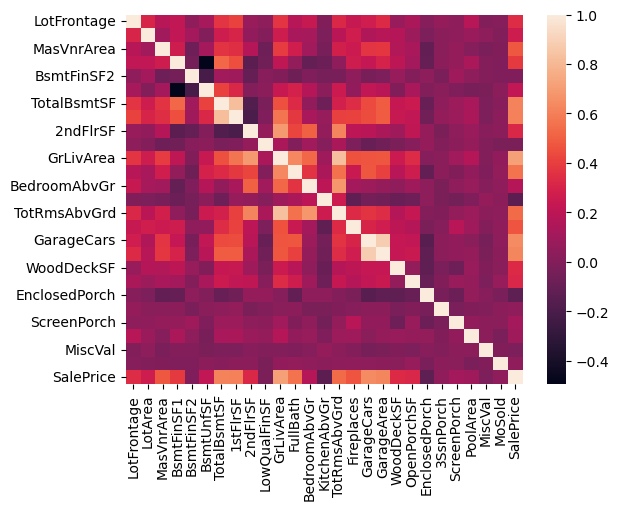

In [46]:
num_corr_matrix = df_num.corr()
sns.heatmap(num_corr_matrix)

In [47]:
def correletion(dframe, threshold):
    corr_columns = set()
    corr_matrix = dframe.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                corr_columns.add(col_name)
    return corr_columns
        

In [48]:
correletion(df_num, 0.60)

{'1stFlrSF',
 'FullBath',
 'GarageArea',
 'GrLivArea',
 'SalePrice',
 'TotRmsAbvGrd'}

In [49]:
num_cols_remove = [
    '1stFlrSF',
    'FullBath',
    'GarageArea',
    'GrLivArea',
    'TotRmsAbvGrd'
]

num_sort_corr = num_corr_matrix["SalePrice"].abs().sort_values(ascending=False)
selected_num = num_sort_corr.head(25).index.to_list()

# Create an empty list to store modified selected numerical columns
modified_selected_num = []

for column in selected_num:
    if column not in num_cols_remove:
        modified_selected_num.append(column)

print(modified_selected_num)


['SalePrice', 'GarageCars', 'TotalBsmtSF', 'MasVnrArea', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF', 'OpenPorchSF', 'LotArea', 'BsmtUnfSF', 'BedroomAbvGr', 'KitchenAbvGr', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MoSold', '3SsnPorch', 'LowQualFinSF']


# New df after Multi-colinearity rediuction

In [50]:
columns_to_remove = []

for column in num_cols_remove:
    columns_to_remove.append(column)
    
for column in cat_cols_remove:
    columns_to_remove.append(column)
    

In [51]:
columns_to_remove

['1stFlrSF',
 'FullBath',
 'GarageArea',
 'GrLivArea',
 'TotRmsAbvGrd',
 'BsmtQual',
 'ExterQual',
 'Exterior2nd',
 'Foundation',
 'GarageYrBlt',
 'KitchenQual',
 'Neighborhood',
 'YearRemodAdd']

In [52]:
df_new = pd.concat([df_cat, df_num], axis=1)
df_new = df_new.reset_index(drop=True)
df_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GarageYrBlt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,FullBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,65.0,8450,196.0,706,0,150,856,856,854,0,1710,2,3,1,8,0,2,548,0,61,0,0,0,0,0,2,208500
1,Single-Story,Good,Excellent,Built Before 2000,Remodelled Before 2000,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,2,3,1,6,1,2,460,298,0,0,0,0,0,0,5,181500
2,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,68.0,11250,162.0,486,0,434,920,920,866,0,1786,2,3,1,6,1,2,608,0,42,0,0,0,0,0,9,223500
3,Two-Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,60.0,9550,0.0,216,0,540,756,961,756,0,1717,1,3,1,7,1,3,642,0,35,272,0,0,0,0,2,140000
4,Two-Story,Excellent,Good,Built After 2000,Remodelled After 2000,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,2,4,1,9,1,3,836,192,84,0,0,0,0,0,12,250000


In [53]:
df_new.shape

(1460, 75)

In [54]:
df_new = df_new.drop(columns_to_remove, axis=1) # removing columns having multicolinearity
df_new.shape

(1460, 62)

In [55]:
df_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,MasVnrType,ExterCond,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,TA,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,65.0,8450,196.0,706,0,150,856,854,0,3,1,0,2,0,61,0,0,0,0,0,2,208500
1,Single-Story,Good,Excellent,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,None,TA,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,80.0,9600,0.0,978,0,284,1262,0,0,3,1,1,2,298,0,0,0,0,0,0,5,181500
2,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,TA,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,68.0,11250,162.0,486,0,434,920,866,0,3,1,1,2,0,42,0,0,0,0,0,9,223500
3,Two-Story,Excellent,Good,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,None,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml,60.0,9550,0.0,216,0,540,756,756,0,3,1,1,3,0,35,272,0,0,0,0,2,140000
4,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,BrkFace,TA,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Typ,Attchd,RFn,TA,TA,Y,WD,Normal,84.0,14260,350.0,655,0,490,1145,1053,0,4,1,1,3,192,84,0,0,0,0,0,12,250000


In [56]:
for column in df_new.columns:
    if column in df_new[modified_selected_cat].columns:
        pass
    elif column in df_new[modified_selected_num].columns:
        pass
    else:
        df_new = df_new.drop(column, axis=1) # dropping those columns that have lower pearson correletion coefficient
        
df_new.shape

(1460, 42)

In [57]:
df_new.head() #final selected df

,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,65.0,8450,196.0,706,150,856,854,0,3,1,0,2,0,61,0,0,0,0,2,208500
1,Single-Story,Good,Excellent,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,80.0,9600,0.0,978,284,1262,0,0,3,1,1,2,298,0,0,0,0,0,5,181500
2,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,68.0,11250,162.0,486,434,920,866,0,3,1,1,2,0,42,0,0,0,0,9,223500
3,Two-Story,Excellent,Good,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,60.0,9550,0.0,216,540,756,756,0,3,1,1,3,0,35,272,0,0,0,2,140000
4,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,84.0,14260,350.0,655,490,1145,1053,0,4,1,1,3,192,84,0,0,0,0,12,250000


In [58]:
df_new.isnull().sum()

MSSubClass       0
OverallQual      0
OverallCond      0
YearBuilt        0
BsmtFullBath     0
BsmtHalfBath     0
HalfBath         0
YrSold           0
MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
LotFrontage      0
LotArea          0
MasVnrArea       0
BsmtFinSF1       0
BsmtUnfSF        0
TotalBsmtSF      0
2ndFlrSF         0
LowQualFinSF     0
BedroomAbvGr     0
KitchenAbvGr     0
Fireplaces       0
GarageCars       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MoSold           0
SalePrice        0
dtype: int64

# Null values can also be fillied in a more efficient and accurate ways. For example, grouping two/three columns and based on the different category and their respective values we can fill by their mode value

In [59]:
num_cols = []
for column in df_new.columns:
    if df_new[column].dtypes == object:
        pass
    else:
        num_cols.append(column)
        
    

In [60]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MoSold',
 'SalePrice']

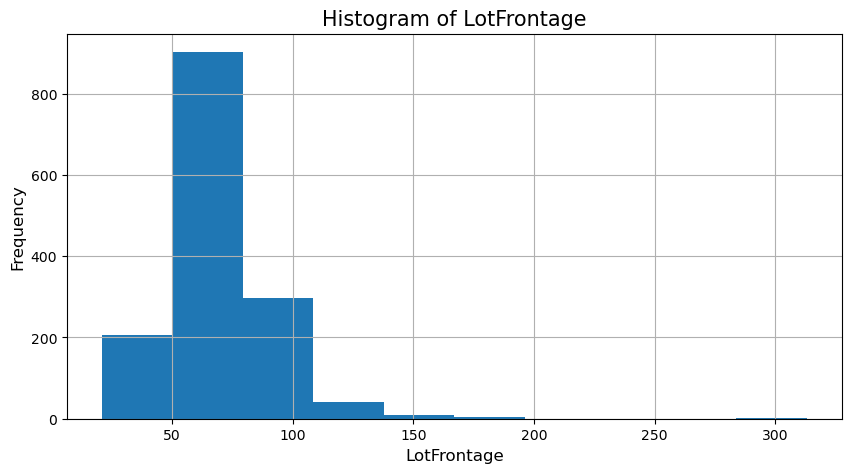

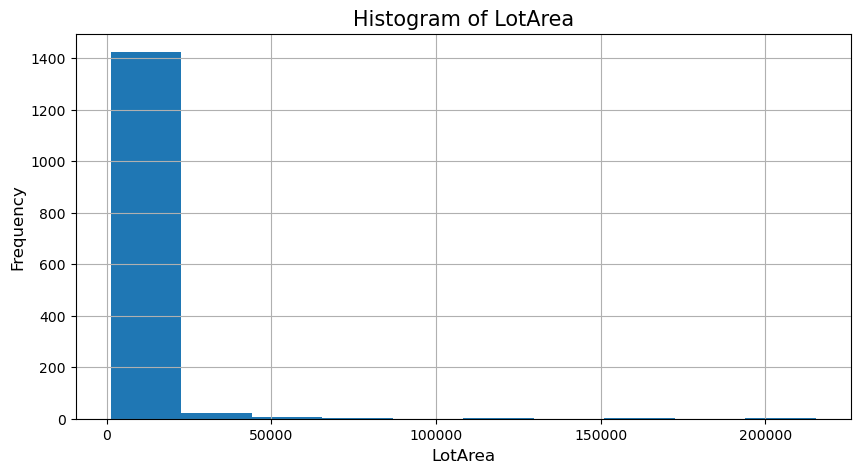

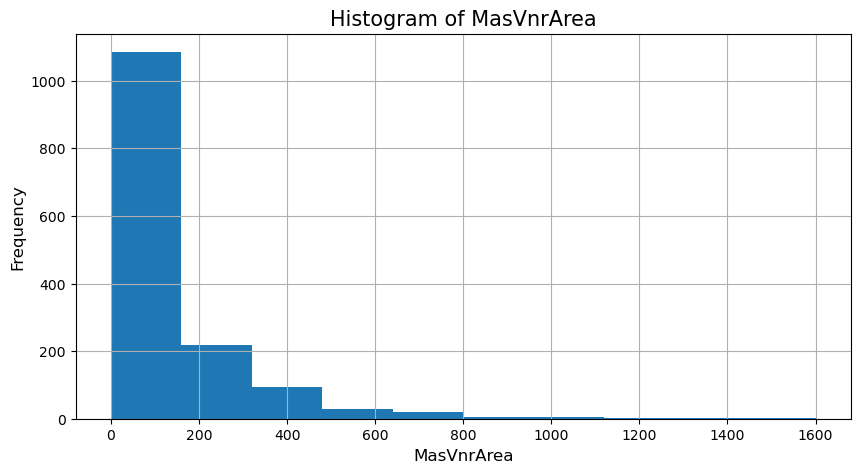

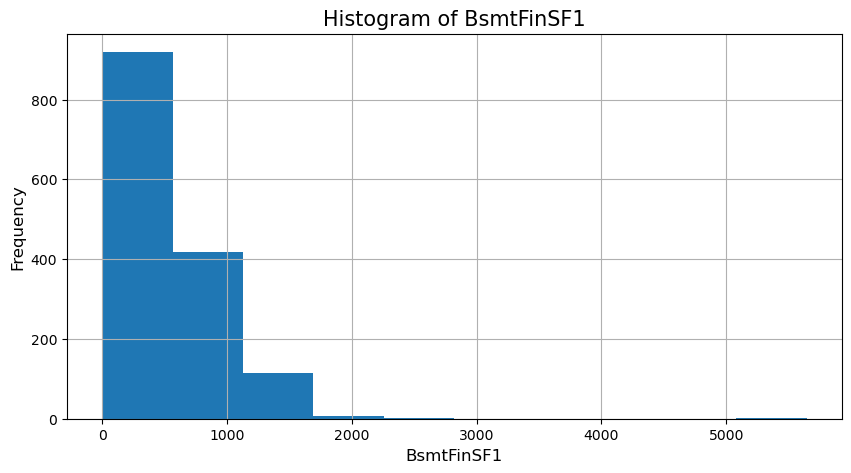

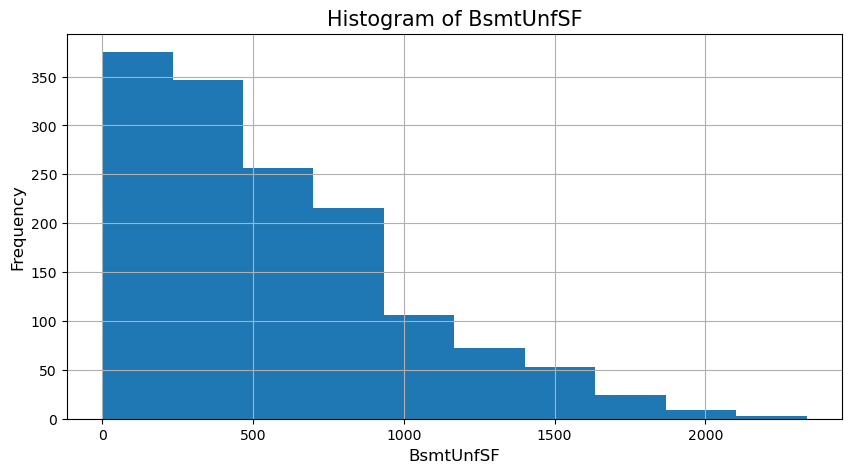

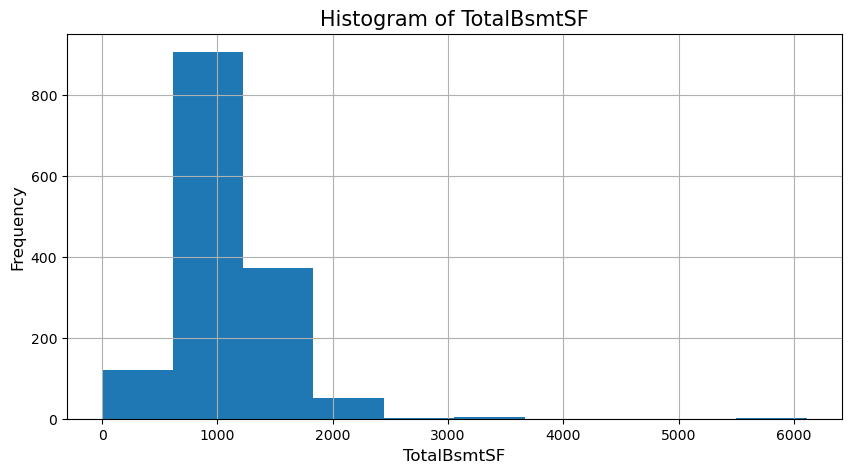

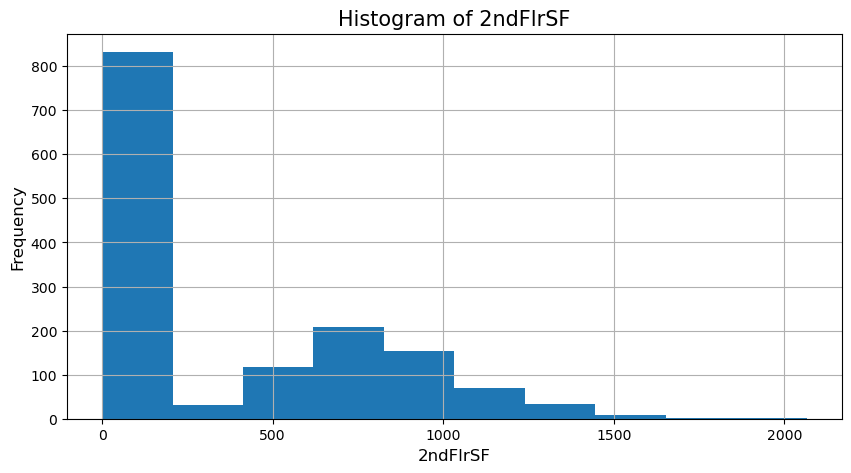

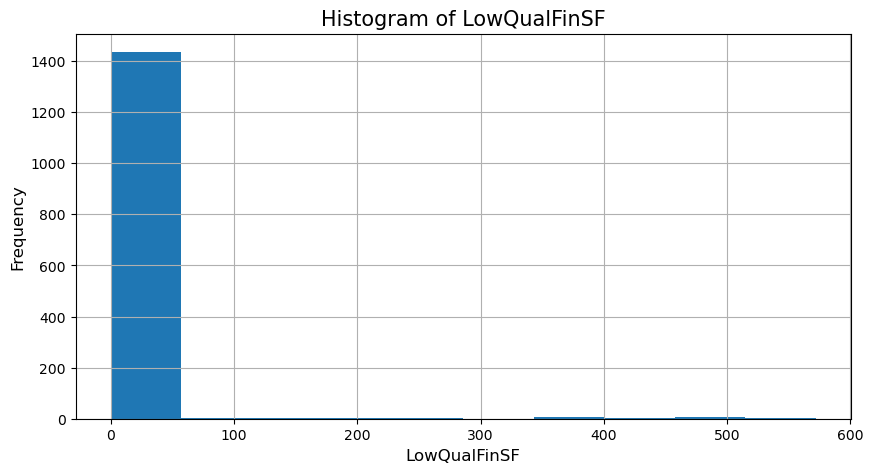

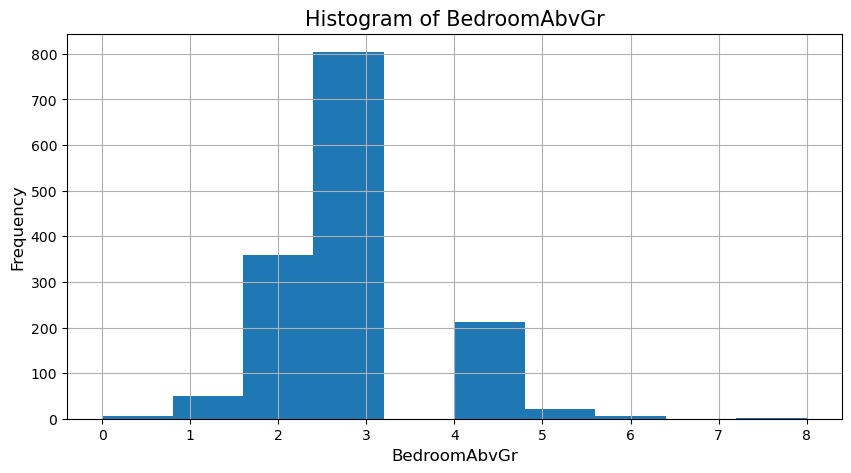

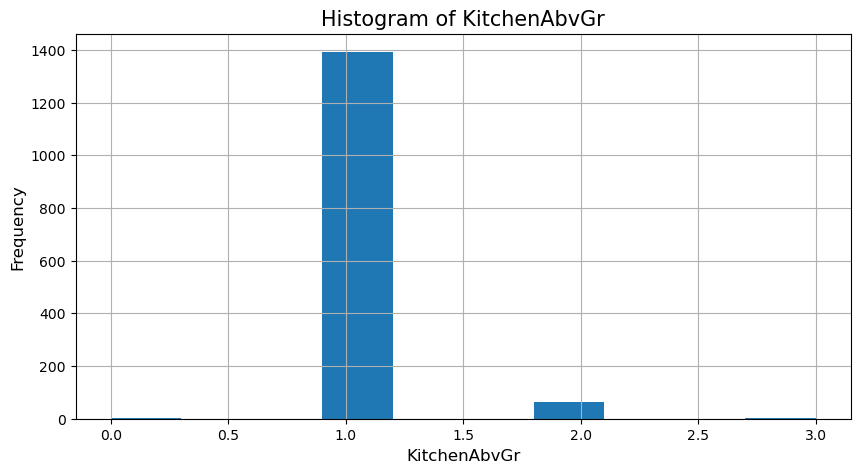

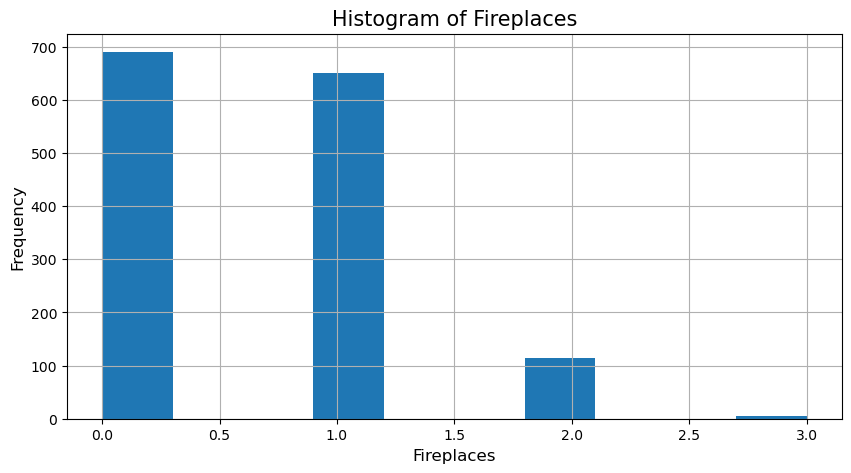

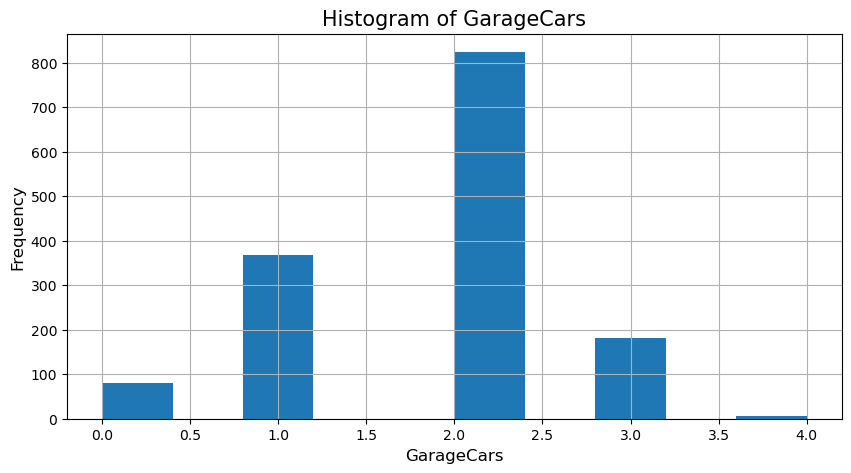

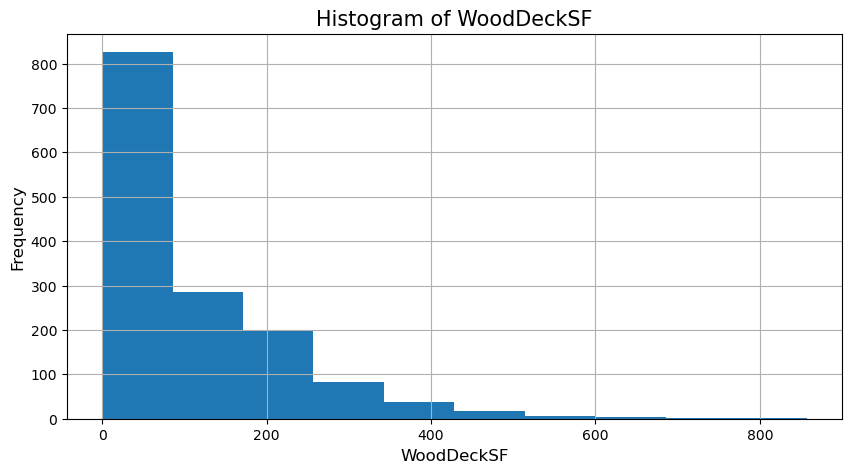

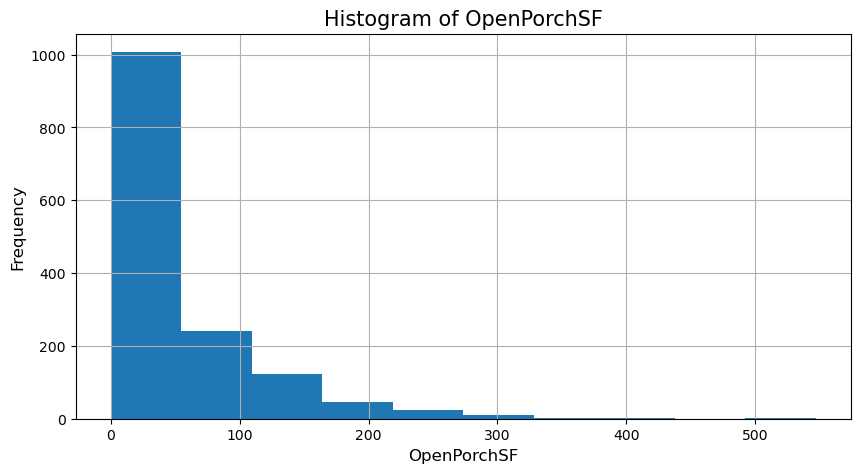

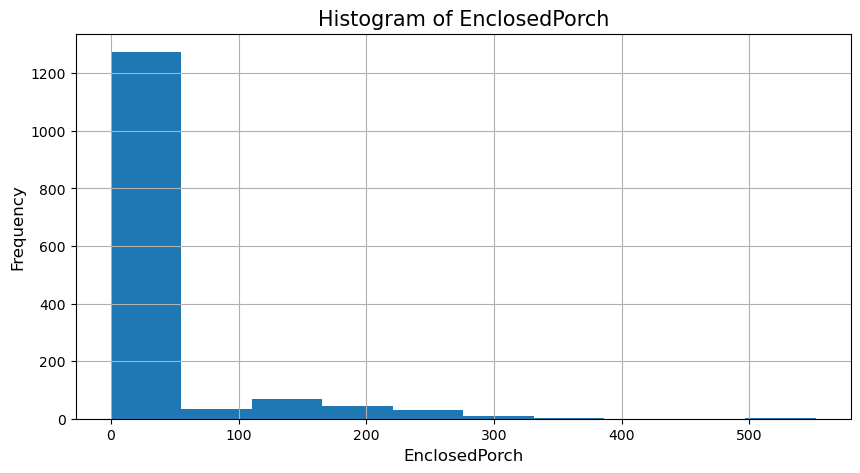

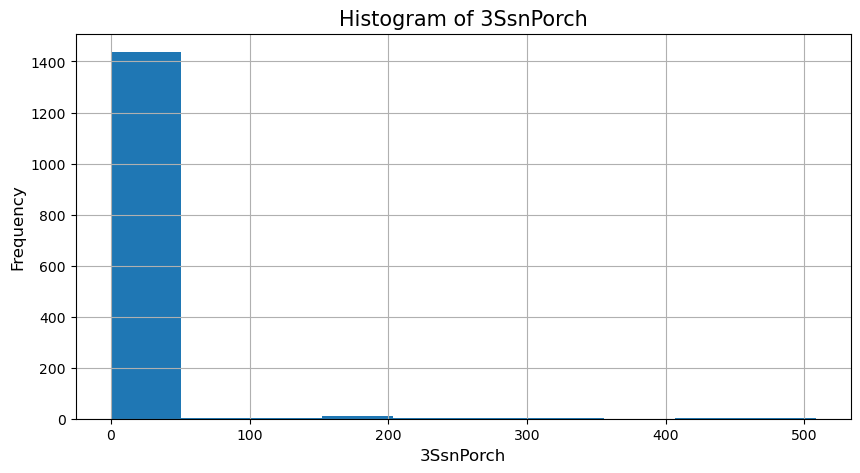

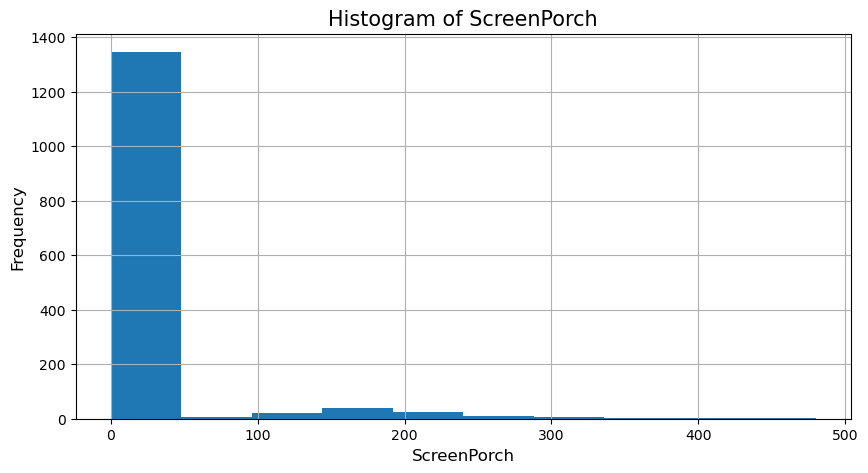

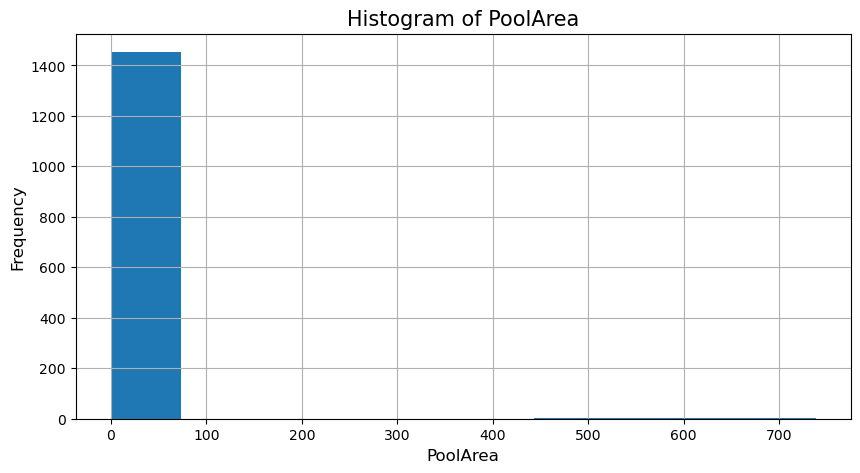

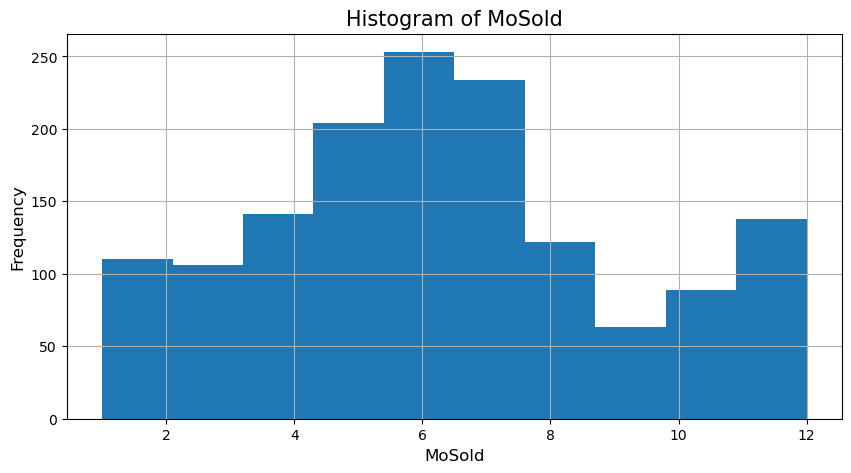

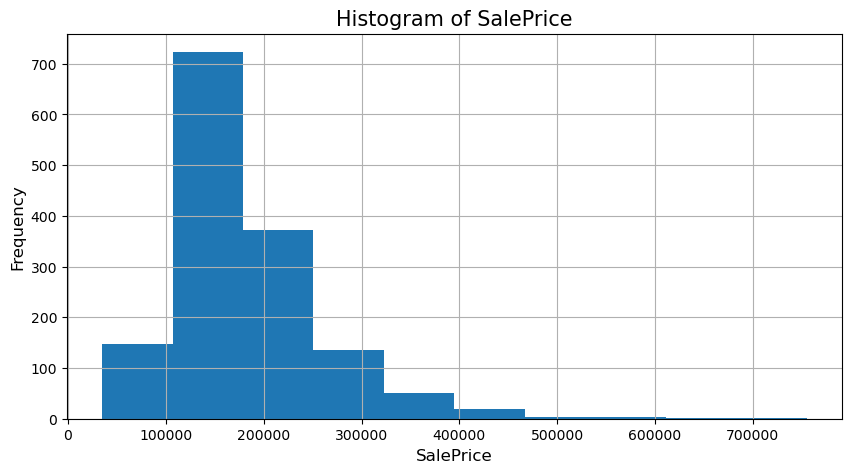

In [61]:
import matplotlib.pyplot as plt

for column in df_new[num_cols].columns:
    plt.figure(figsize=(10,5))
    df_new[column].hist()
    plt.title(f"Histogram of {column}", fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True)
    plt.show()


<Axes: xlabel='LotArea', ylabel='LotFrontage'>

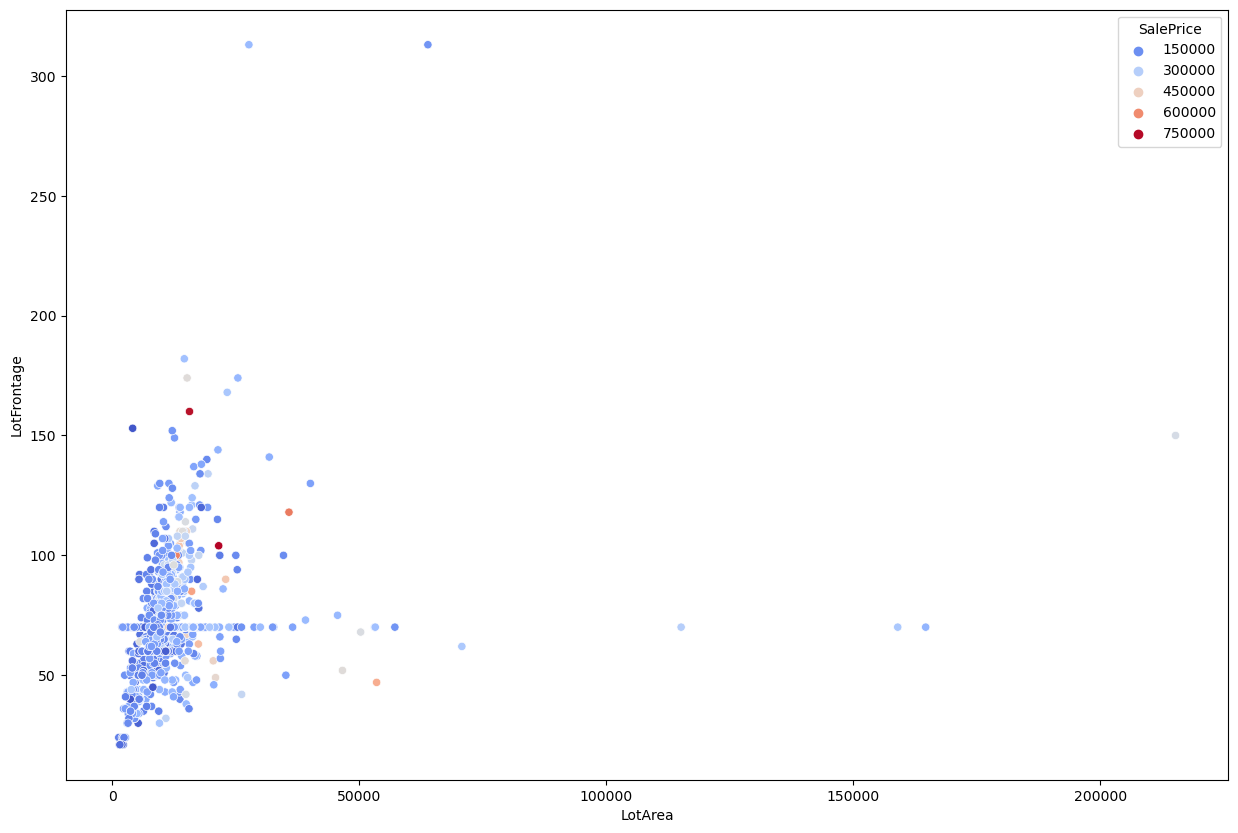

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))

sns.scatterplot(y="LotFrontage", x="LotArea", hue="SalePrice", palette="coolwarm", data=df_new)


In [63]:
df_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,65.0,8450,196.0,706,150,856,854,0,3,1,0,2,0,61,0,0,0,0,2,208500
1,Single-Story,Good,Excellent,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,80.0,9600,0.0,978,284,1262,0,0,3,1,1,2,298,0,0,0,0,0,5,181500
2,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,68.0,11250,162.0,486,434,920,866,0,3,1,1,2,0,42,0,0,0,0,9,223500
3,Two-Story,Excellent,Good,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,60.0,9550,0.0,216,540,756,756,0,3,1,1,3,0,35,272,0,0,0,2,140000
4,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,84.0,14260,350.0,655,490,1145,1053,0,4,1,1,3,192,84,0,0,0,0,12,250000


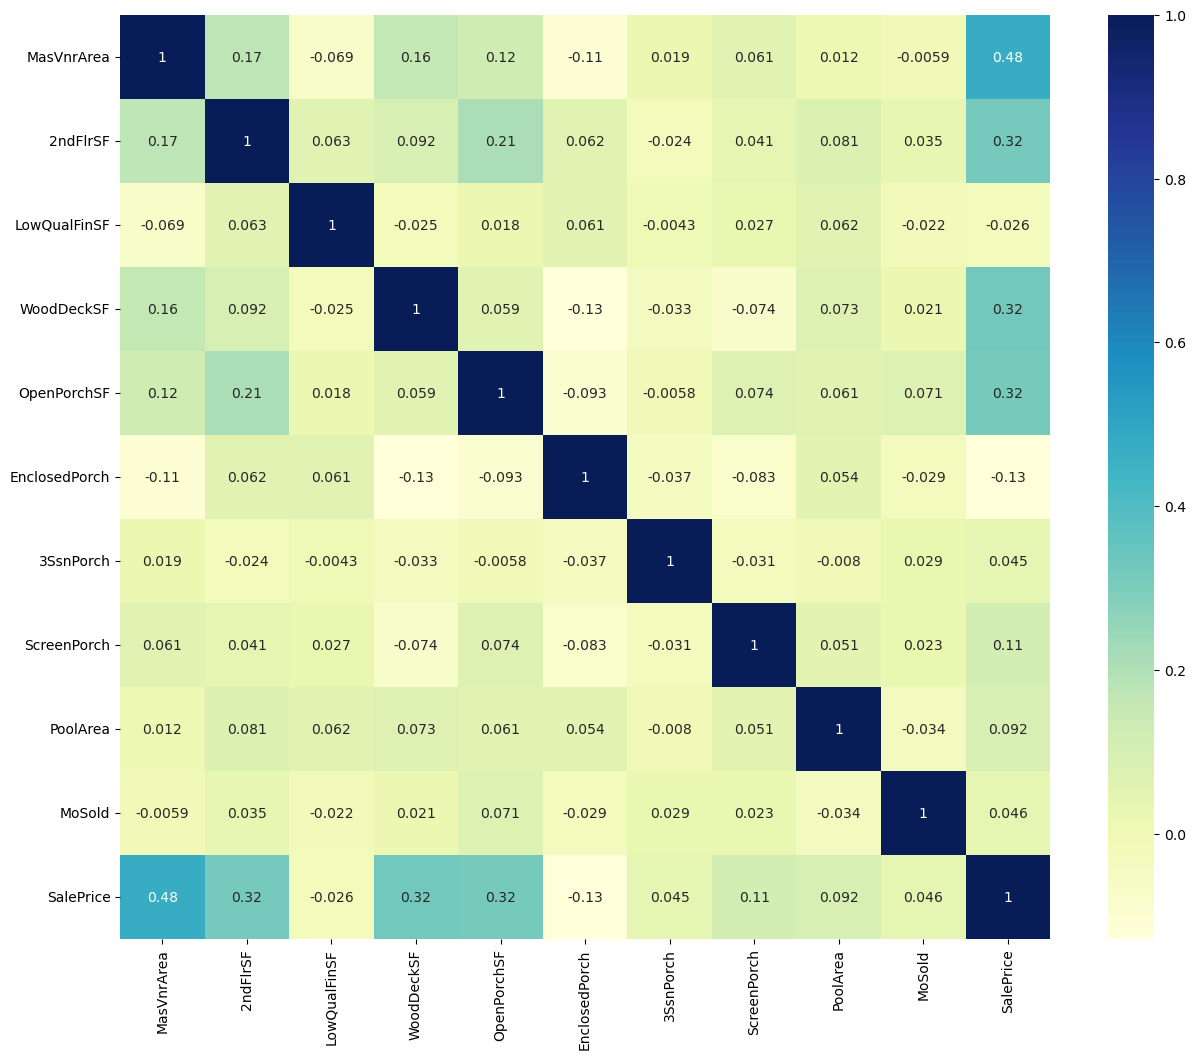

In [64]:
basement =["MasVnrArea","2ndFlrSF","LowQualFinSF","WoodDeckSF","OpenPorchSF","EnclosedPorch","3SsnPorch","ScreenPorch","PoolArea","MoSold", "SalePrice"]

basement_corr_mat = df_new[basement].corr()
plt.figure(figsize=(15,12))
sns.heatmap(basement_corr_mat, annot=True, cmap="YlGnBu")
plt.show()

In [65]:
columns_drop = ["PoolArea","MoSold", "3SsnPorch","ScreenPorch", "EnclosedPorch", "LowQualFinSF"]
df_new = df_new.drop(columns_drop, axis=1)
df_new.head()

,MSSubClass,OverallQual,OverallCond,YearBuilt,BsmtFullBath,BsmtHalfBath,HalfBath,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,65.0,8450,196.0,706,150,856,854,3,1,0,2,0,61,208500
1,Single-Story,Good,Excellent,Built Before 2000,No,Yes,No,Before 2008,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,80.0,9600,0.0,978,284,1262,0,3,1,1,2,298,0,181500
2,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,68.0,11250,162.0,486,434,920,866,3,1,1,2,0,42,223500
3,Two-Story,Excellent,Good,Built Before 2000,Yes,No,No,Before 2008,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,60.0,9550,0.0,216,540,756,756,3,1,1,3,0,35,140000
4,Two-Story,Excellent,Good,Built After 2000,Yes,No,Yes,2008 or After,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,84.0,14260,350.0,655,490,1145,1053,4,1,1,3,192,84,250000


In [66]:
df_new.shape

(1460, 36)

In [67]:
cat_cols = []
num_cols= []
for column in df_new.columns:
    if df_new[column].dtypes == object:
        cat_cols.append(column)
    else:
         if column != "SalePrice":
            num_cols.append(column)

In [68]:
cat_cols

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'YrSold',
 'MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st']

In [69]:
num_cols

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'WoodDeckSF',
 'OpenPorchSF']

In [70]:
dummies = pd.get_dummies(df_new[cat_cols])
dummies.head()

,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,HalfBath_No,HalfBath_Yes,YrSold_2008 or After,YrSold_Before 2008,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing
0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [71]:
encoded_df_train = df_new.drop(cat_cols, axis=1)
encoded_df_train = pd.concat([dummies, encoded_df_train], axis=1)
encoded_df_train.head()

,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,HalfBath_No,HalfBath_Yes,YrSold_2008 or After,YrSold_Before 2008,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,Utilities_NoSeWa,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF,SalePrice
0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,65.0,8450,196.0,706,150,856,854,3,1,0,2,0,61,208500
1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,80.0,9600,0.0,978,284,1262,0,3,1,1,2,298,0,181500
2,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,68.0,11250,162.0,486,434,920,866,3,1,1,2,0,42,223500
3,0,0,1,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,60.0,9550,0.0,216,540,756,756,3,1,1,3,0,35,140000
4,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,84.0,14260,350.0,655,490,1145,1053,4,1,1,3,192,84,250000


In [72]:
encoded_df_train.shape

(1460, 117)

# Now do the same for the test dataset

In [73]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\test.csv")
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns",None)
df = df.drop("Id", axis=1)

In [74]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [75]:
import warnings
warnings.filterwarnings("ignore")

category_mapping = {
    '20': 'Single-Story',
    '30': 'Single-Story',
    '40': 'Single-Story',
    '45': 'Single-Story',
    '50': 'Single-Story',
    '60': 'Two-Story',
    '70': 'Two-Story',
    '75': 'Two-Story',
    '80': 'Other',
    '85': 'Other',
    '90': 'Other',
    '120': 'Single-Story',
    '150': 'Single-Story',
    '160': 'Two-Story',
    '180': 'Other',
    '190': 'Other'
}

df['MSSubClass'] = df['MSSubClass'].astype(str)
df['MSSubClass'] = df['MSSubClass'].replace(category_mapping)
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
category_mapping={
    "10": "Excellent",
    "9" : "Excellent",
    "8" : "Excellent",
    "7" : "Excellent",
    "6" : "Good",
    "5" : "Good",
    "4" : "Good",
    "3" : "Poor",
    "2" : "Poor",
    "1" : "Poor"
}

df["OverallQual"] = df["OverallQual"].astype(str)
df["OverallCond"] = df["OverallCond"].astype(str)
df["OverallQual"] = df["OverallQual"].replace(category_mapping)
df["OverallCond"] = df["OverallCond"].replace(category_mapping)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [77]:
import numpy as np


df["YearBuilt"] = np.where(df["YearBuilt"] < 2000, "Built Before 2000", "Built After 2000")

df["YearRemodAdd"] = np.where(df["YearRemodAdd"] < 2000, "Remodelled Before 2000", "Remodelled After 2000")

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [78]:

df["GarageYrBlt"] = np.where(df["GarageYrBlt"] <2000, "Built Before 2000", "Built After 2000")

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,Built Before 2000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,Built Before 2000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,Built Before 2000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [79]:
column = ["BsmtFullBath","BsmtHalfBath","HalfBath"]

for column in column:
    df[column] = np.where(df[column] == 1, "Yes", "No")
    
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,No,No,1,No,2,1,TA,5,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,No,No,1,Yes,3,1,Gd,6,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,No,No,2,Yes,3,1,TA,6,Typ,1,TA,Attchd,Built Before 2000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,No,No,2,Yes,3,1,Gd,7,Typ,1,Gd,Attchd,Built Before 2000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,No,No,2,No,2,1,Gd,5,Typ,0,NaN,Attchd,Built Before 2000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [80]:
df["YrSold"] = np.where(df["YrSold"] < 2008, "Before 2008", "2008 or After")

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,No,No,1,No,2,1,TA,5,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2008 or After,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,No,No,1,Yes,3,1,Gd,6,Typ,0,NaN,Attchd,Built Before 2000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2008 or After,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,No,No,2,Yes,3,1,TA,6,Typ,1,TA,Attchd,Built Before 2000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2008 or After,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,No,No,2,Yes,3,1,Gd,7,Typ,1,Gd,Attchd,Built Before 2000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2008 or After,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,No,No,2,No,2,1,Gd,5,Typ,0,NaN,Attchd,Built Before 2000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2008 or After,WD,Normal


In [81]:
missing_cols = []

for column in df.columns:
    if df[column].isnull().sum() >= 600:
        missing_cols.append(column)
    else:
        pass
    
missing_cols

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [82]:
df = df.drop(missing_cols, axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,Single-Story,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,No,No,1,No,2,1,TA,5,Typ,0,Attchd,Built Before 2000,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2008 or After,WD,Normal
1,Single-Story,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,Good,Good,Built Before 2000,Remodelled Before 2000,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,No,No,1,Yes,3,1,Gd,6,Typ,0,Attchd,Built Before 2000,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2008 or After,WD,Normal
2,Two-Story,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,No,No,2,Yes,3,1,TA,6,Typ,1,Attchd,Built Before 2000,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2008 or After,WD,Normal
3,Two-Story,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Good,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,No,No,2,Yes,3,1,Gd,7,Typ,1,Attchd,Built Before 2000,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2008 or After,WD,Normal
4,Single-Story,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,Excellent,Good,Built Before 2000,Remodelled Before 2000,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,No,No,2,No,2,1,Gd,5,Typ,0,Attchd,Built Before 2000,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2008 or After,WD,Normal


In [83]:
cat_cols = []
num_cols = []

for column in df.columns:
    if df[column].dtypes == object:
        cat_cols.append(column)
    else:
        num_cols.append(column)

In [84]:
len(cat_cols), len(num_cols), len(cat_cols) + len(num_cols)

(48, 26, 74)

In [85]:
for column in df[cat_cols].columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)
    
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      227
LotArea            0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea        15
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         1
BsmtFinType2       0
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath     

In [86]:
for column in df[num_cols].columns:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [87]:
modified_selected_num.remove("SalePrice")
for column in df.columns:
    if column in df[modified_selected_cat].columns:
        pass
    elif column in df[modified_selected_num].columns:
        pass
    else:
        df = df.drop(column, axis=1) # dropping those columns that have lower pearson correletion coefficient
        
df.shape

(1459, 41)

In [88]:
columns_drop = ["PoolArea","MoSold", "3SsnPorch","ScreenPorch", "EnclosedPorch", "LowQualFinSF"]
df = df.drop(columns_drop, axis=1)
df.shape

(1459, 35)

In [89]:
cat_cols = []
num_cols= []
for column in df.columns:
    if df[column].dtypes == object:
        cat_cols.append(column)
    else:
        num_cols.append(column)

In [90]:
dummies = pd.get_dummies(df[cat_cols])
dummies.head()

,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,HalfBath_No,HalfBath_Yes,YrSold_2008 or After,YrSold_Before 2008
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0
1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0
2,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
3,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
4,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0


In [91]:
encoded_df_test = df.drop(cat_cols, axis=1)
encoded_df_test = pd.concat([dummies, encoded_df_test], axis=1)
encoded_df_test.head()

,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_AllPub,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,HalfBath_No,HalfBath_Yes,YrSold_2008 or After,YrSold_Before 2008,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,BedroomAbvGr,KitchenAbvGr,Fireplaces,GarageCars,WoodDeckSF,OpenPorchSF
0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,80.0,11622,0.0,468.0,270.0,882.0,0,2,1,0,1.0,140,0
1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,81.0,14267,108.0,923.0,406.0,1329.0,0,3,1,0,1.0,393,36
2,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,74.0,13830,0.0,791.0,137.0,928.0,701,3,1,1,2.0,212,34
3,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,78.0,9978,20.0,602.0,324.0,926.0,678,3,1,1,2.0,360,36
4,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,43.0,5005,0.0,263.0,1017.0,1280.0,0,2,1,0,2.0,0,82


In [92]:
encoded_df_test.shape

(1459, 105)

In [93]:
encoded_df_train.shape

(1460, 117)

In [94]:
encoded_df_train = encoded_df_train.sort_index(axis=1)
encoded_df_train.head()

,2ndFlrSF,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinSF1,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,BsmtUnfSF,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Fireplaces,GarageCars,HalfBath_No,HalfBath_Yes,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenAbvGr,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,OpenPorchSF,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,RoofMatl_ClyTile,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SalePrice,Street_Grvl,Street_Pave,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,YrSold_2008 or After,YrSold_Before 2008
0,854,3,1,0,0,0,0,706,0,1,1,0,150,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,8450,0,0,0,0,1,65.0,0,0,0,1,0,0,1,0,0,0,1,0,196.0,61,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,208500,0,1,856,1,0,0,1,0,1,0
1,0,3,1,0,0,0,0,978,1,0,0,1,284,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,2,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,9600,0,0,1,0,0,80.0,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,181500,0,1,1262,1,0,298,0,1,0,1
2,866,3,1,0,0,0,0,486,0,1,1,0,434,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,11250,0,0,0,0,1,68.0,1,0,0,0,0,0,1,0,0,0,1,0,162.0,42,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,223500,0,1,920,1,0,0,1,0,1,0
3,756,3,1,0,0,0,0,216,0,1,1,0,540,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,9550,1,0,0,0,0,60.0,1,0,0,0,0,0,1,0,0,0,1,0,0.0,35,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,140000,0,1,756,1,0,0,0,1,0,1
4,1053,4,1,0,0,0,0,655,0,1,1,0,490,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,14260,0,0,1,0,0,84.0,1,0,0,0,0,0,1,0,0,0,1,0,350.0,84,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,250000,0,1,1145,1,0,192,1,0,1,0


In [95]:
cols_remove = []
for column in encoded_df_train.columns:
    if column not in encoded_df_test.columns:
        cols_remove.append(column)
        
print(cols_remove)

['Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'Exterior1st_ImStucc', 'Exterior1st_Stone', 'HouseStyle_2.5Fin', 'RoofMatl_ClyTile', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'SalePrice', 'Utilities_NoSeWa']


In [96]:
X_train = encoded_df_train.drop(cols_remove, axis=1)
# X_train = X_train.sort_index(axis=1)
X_train.head()

,2ndFlrSF,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinSF1,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,BsmtUnfSF,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Fireplaces,GarageCars,HalfBath_No,HalfBath_Yes,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenAbvGr,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,OpenPorchSF,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Street_Grvl,Street_Pave,TotalBsmtSF,Utilities_AllPub,WoodDeckSF,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,YrSold_2008 or After,YrSold_Before 2008
0,854,3,1,0,0,0,0,706,0,1,1,0,150,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,8450,0,0,0,0,1,65.0,0,0,0,1,0,0,1,0,0,0,1,0,196.0,61,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,856,1,0,1,0,1,0
1,0,3,1,0,0,0,0,978,1,0,0,1,284,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,9600,0,0,1,0,0,80.0,0,0,0,1,0,1,0,0,0,0,1,0,0.0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1262,1,298,0,1,0,1
2,866,3,1,0,0,0,0,486,0,1,1,0,434,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,11250,0,0,0,0,1,68.0,1,0,0,0,0,0,1,0,0,0,1,0,162.0,42,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,920,1,0,1,0,1,0
3,756,3,1,0,0,0,0,216,0,1,1,0,540,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,3,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,9550,1,0,0,0,0,60.0,1,0,0,0,0,0,1,0,0,0,1,0,0.0,35,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,756,1,0,0,1,0,1
4,1053,4,1,0,0,0,0,655,0,1,1,0,490,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,3,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,14260,0,0,1,0,0,84.0,1,0,0,0,0,0,1,0,0,0,1,0,350.0,84,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1145,1,192,1,0,1,0


In [97]:
X_train.shape

(1460, 105)

In [98]:
X_test = encoded_df_test
X_test = X_test.sort_index(axis=1)
X_test.shape

(1459, 105)

In [99]:
X_test.head()

,2ndFlrSF,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtFinSF1,BsmtFullBath_No,BsmtFullBath_Yes,BsmtHalfBath_No,BsmtHalfBath_Yes,BsmtUnfSF,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Fireplaces,GarageCars,HalfBath_No,HalfBath_Yes,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenAbvGr,LandContour_Bnk,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Gtl,LandSlope_Mod,LandSlope_Sev,LotArea,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotFrontage,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSSubClass_Other,MSSubClass_Single-Story,MSSubClass_Two-Story,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrArea,OpenPorchSF,OverallCond_Excellent,OverallCond_Good,OverallCond_Poor,OverallQual_Excellent,OverallQual_Good,OverallQual_Poor,RoofMatl_CompShg,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Street_Grvl,Street_Pave,TotalBsmtSF,Utilities_AllPub,WoodDeckSF,YearBuilt_Built After 2000,YearBuilt_Built Before 2000,YrSold_2008 or After,YrSold_Before 2008
0,0,2,1,0,0,0,0,468.0,1,0,1,0,270.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,11622,0,0,0,0,1,80.0,0,0,0,1,0,1,0,0,0,1,0,0,0.0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,882.0,1,140,0,1,1,0
1,0,3,1,0,0,0,0,923.0,1,0,1,0,406.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,14267,1,0,0,0,0,81.0,1,0,0,0,0,1,0,0,0,0,1,0,108.0,36,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1329.0,1,393,0,1,1,0
2,701,3,1,0,0,0,0,791.0,1,0,1,0,137.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,13830,0,0,0,0,1,74.0,1,0,0,0,0,0,1,0,0,0,1,0,0.0,34,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,928.0,1,212,0,1,1,0
3,678,3,1,0,0,0,0,602.0,1,0,1,0,324.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,9978,0,0,0,0,1,78.0,1,0,0,0,0,0,1,0,0,0,1,0,20.0,36,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,926.0,1,360,0,1,1,0
4,0,2,0,0,0,0,1,263.0,1,0,1,0,1017.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2.0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,5005,0,0,0,0,1,43.0,1,0,0,0,0,1,0,0,0,0,1,0,0.0,82,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1280.0,1,0,0,1,1,0


In [100]:
y_train = encoded_df_train["SalePrice"]

In [108]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor model
rf = RandomForestRegressor()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_rf = best_model.predict(X_test)

In [109]:
y_pred_rf = pd.DataFrame(y_pred_rf)
y_pred_rf.to_csv(r"C:\Users\DELL\Desktop\Predicted House Sale Price_rf.csv", index=False)


In [110]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Create an XGBoost Regressor model
xgb = XGBRegressor()

# Define hyperparameters and their possible values
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Create a GridSearchCV object with cross-validation
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the model using the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred_xgb = best_model.predict(X_test)


In [111]:
y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.to_csv(r"C:\Users\DELL\Desktop\Predicted House Sale Price_xgb.csv", index=False)
